In [1]:
!pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics.scorer import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read file 'palm_ffb.csv'

palm = pd.read_csv("palm_ffb.csv")
palm.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
# Check data type

palm.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

In [4]:
# Check data dimension

palm.ndim

2

In [5]:
# Check data shape

palm.shape

(130, 9)

In [6]:
# Check data info

palm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [7]:
# Check data description

palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [8]:
# Transform columns into float data type

NumCols=['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested','FFB_Yield']

palm[NumCols] = palm[NumCols].apply(lambda x: x.astype('float64'))

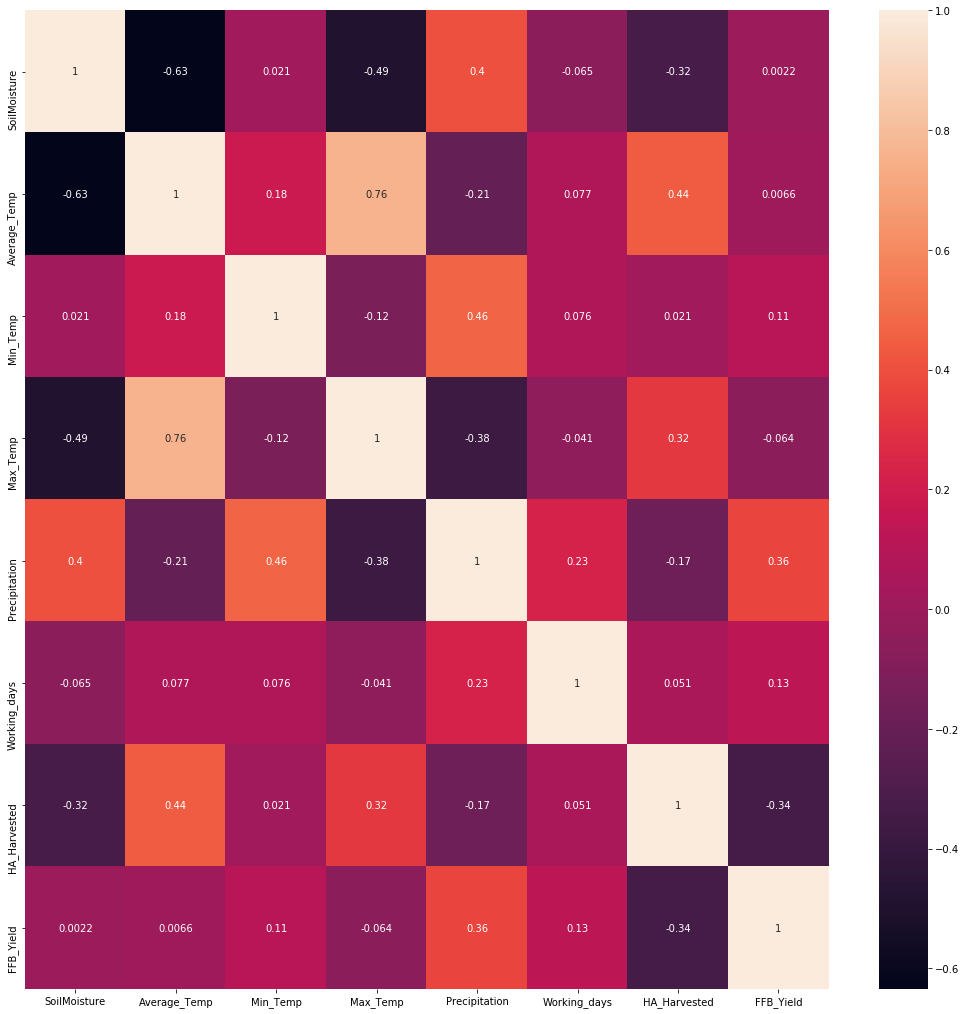

In [9]:
# Transform raw into log data and visualize correlation

palm_log = (palm[NumCols]+1).transform(np.log)

plt.figure(figsize = (18,18))
sns.heatmap(palm_log.corr(), annot = True)

In [10]:
# Scatter plots of FFB_Yield by each of factors

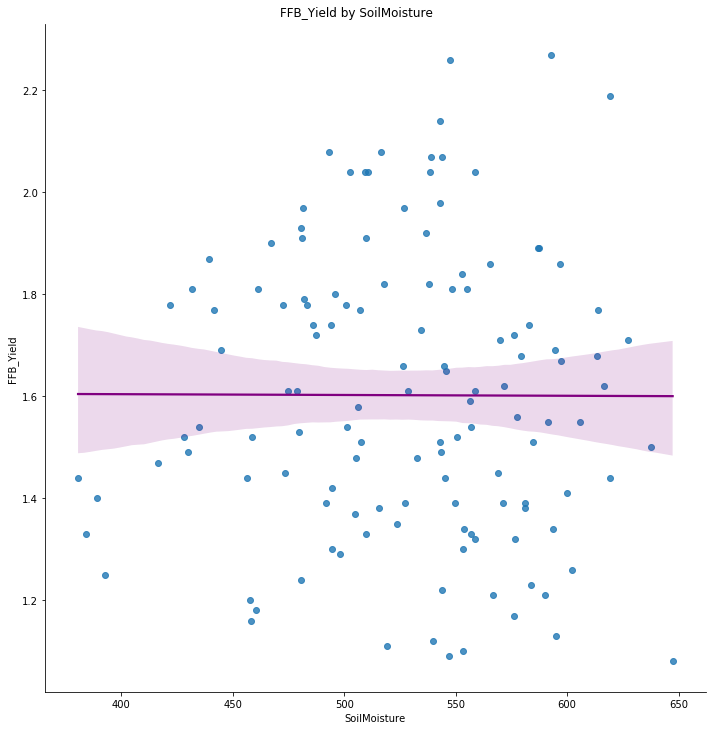

In [11]:
sns.lmplot(x = "SoilMoisture", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'purple'}, size=10).fig.suptitle("FFB_Yield by SoilMoisture", 
                                    y=1.01)
plt.show()

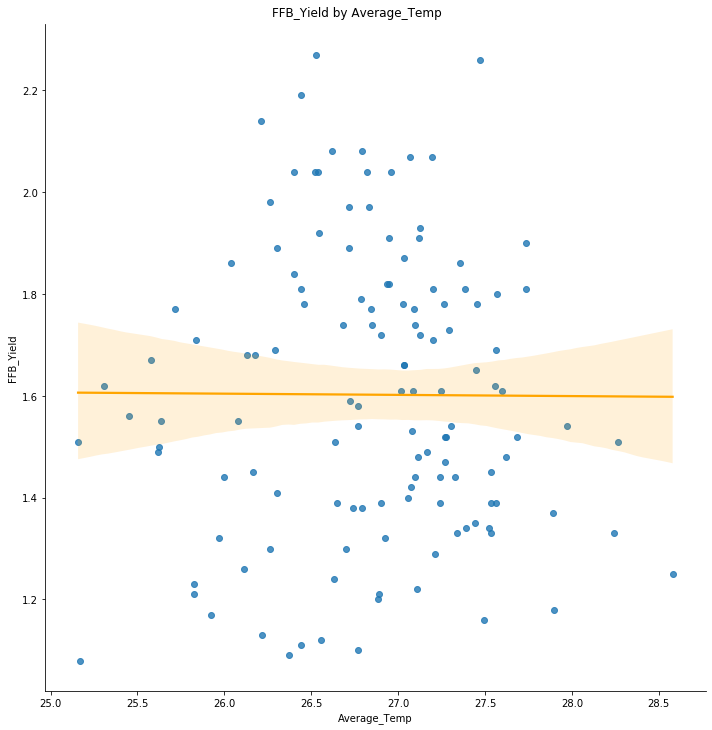

In [12]:
sns.lmplot(x = "Average_Temp", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'orange'}, size=10).fig.suptitle("FFB_Yield by Average_Temp", 
                                    y=1.01)
plt.show()

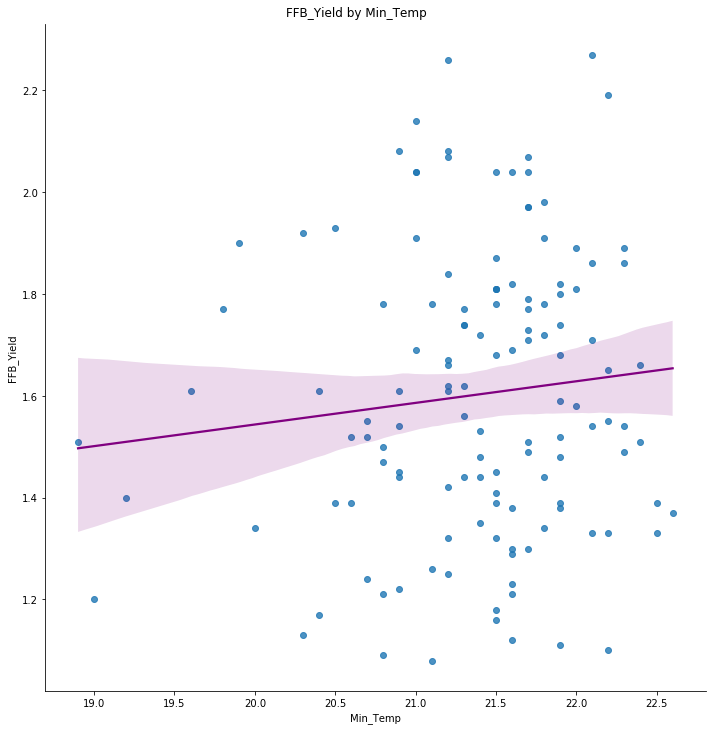

In [13]:
sns.lmplot(x = "Min_Temp", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'purple'}, size=10).fig.suptitle("FFB_Yield by Min_Temp", 
                                    y=1.01)
plt.show()

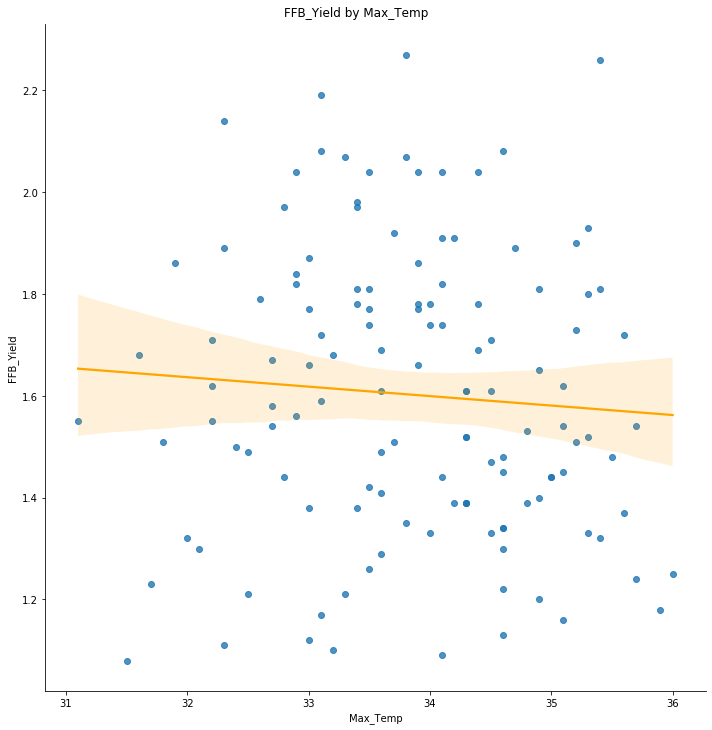

In [14]:
sns.lmplot(x = "Max_Temp", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'orange'}, size=10).fig.suptitle("FFB_Yield by Max_Temp", 
                                    y=1.01)
plt.show()

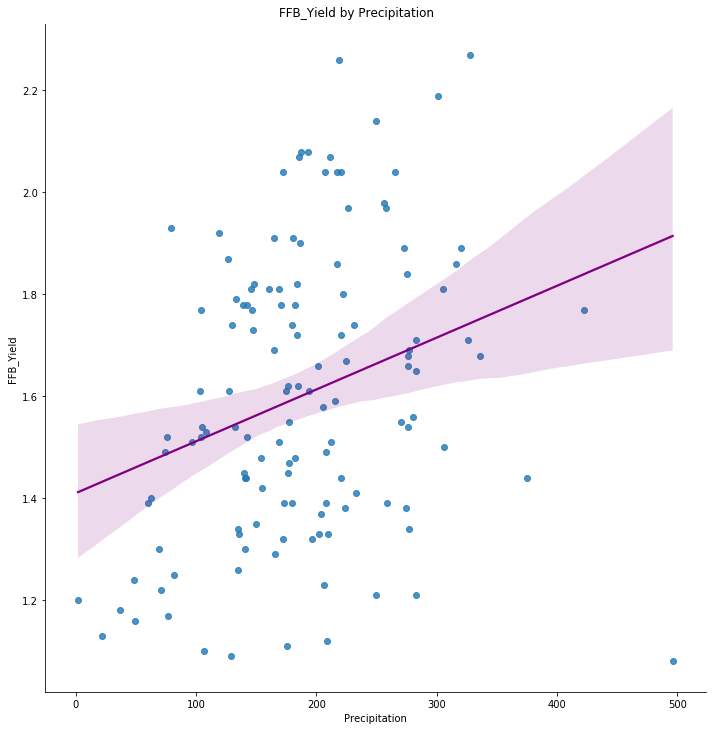

In [15]:
sns.lmplot(x = "Precipitation", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'purple'}, size=10).fig.suptitle("FFB_Yield by Precipitation", 
                                    y=1.01)
plt.show()

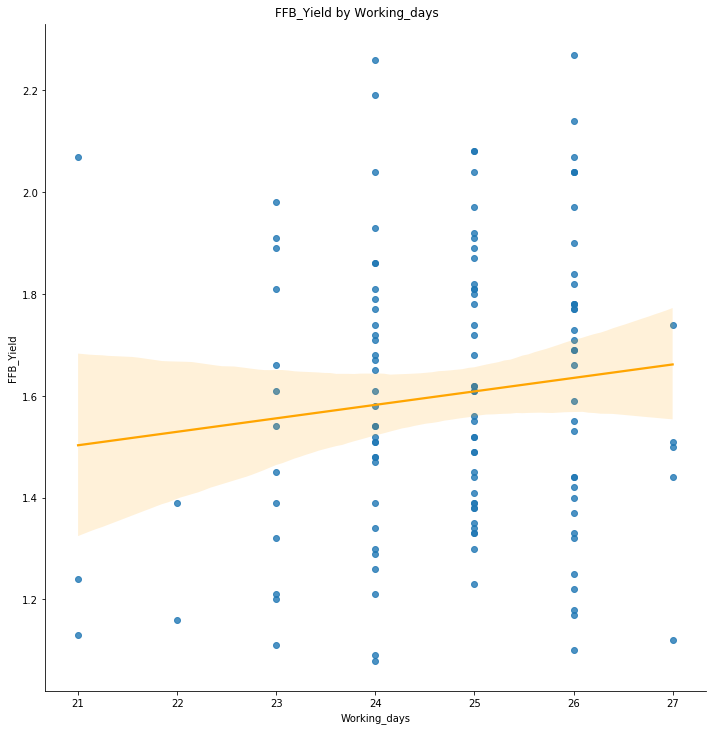

In [16]:
sns.lmplot(x = "Working_days", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'orange'}, size=10).fig.suptitle("FFB_Yield by Working_days", 
                                    y=1.01)
plt.show()

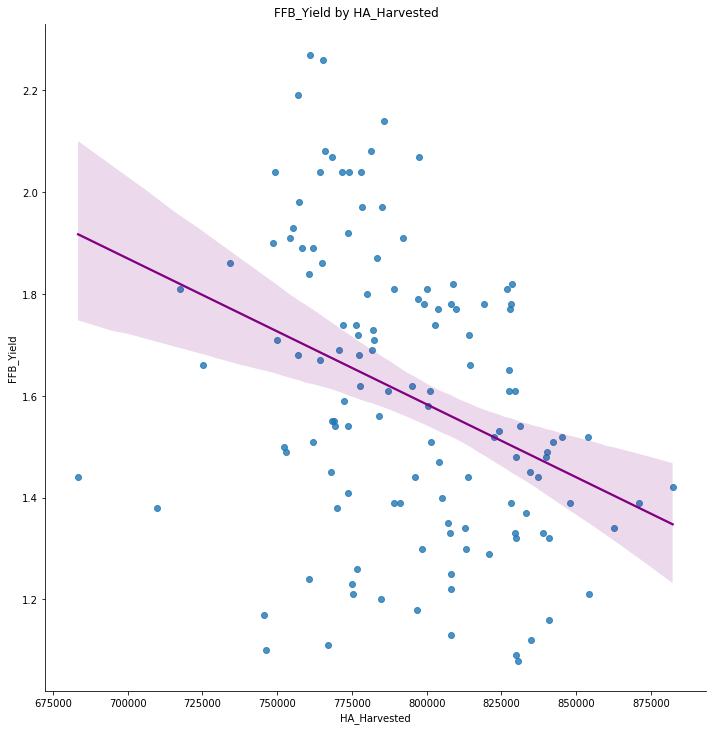

In [17]:
sns.lmplot(x = "HA_Harvested", y  = "FFB_Yield", data = palm, 
           ci = 95, line_kws={'color': 'purple'}, size=10).fig.suptitle("FFB_Yield by HA_Harvested", 
                                    y=1.01)
plt.show()

In [18]:
# Drop column 'Date' for analyzing

palm.drop(['Date'],axis=1,inplace=True)

In [19]:
# Check data info

palm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    float64
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
dtypes: float64(8)
memory usage: 8.2 KB


In [20]:
# Use factor analyzer to find chi square and p value

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(palm)
chi_square_value, p_value

(366.69518726869654, 5.016713382054233e-61)

In [21]:
# Use factor analyzer to find kmo_model

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(palm)

kmo_model

0.6100480254413713

In [22]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(rotation=None)
fa.fit(palm)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

In [23]:
# Check Eigenvalues

ev, v = fa.get_eigenvalues()
ev

array([2.95132334, 1.43342377, 1.11222758, 0.94960749, 0.59516051,
       0.52534344, 0.29303677, 0.13987712])

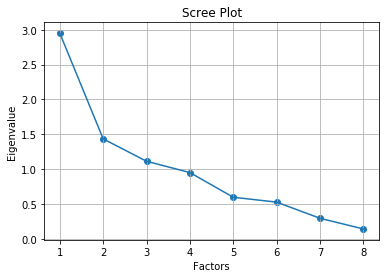

In [24]:
# Create scree plot using matplotlib
plt.scatter(range(1,palm.shape[1]+1),ev)
plt.plot(range(1,palm.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [25]:
print("Only 3-factors eigenvalues are greater than one.")

Only 3-factors eigenvalues are greater than one.


In [26]:
# Factor Analysis with no rotation

fa = FactorAnalyzer(rotation=None)

fa.fit(palm)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

In [27]:
# Loading of Factor Analysis with no rotation

fa.loadings_

array([[-0.70437489, -0.15912041,  0.10047422],
       [ 0.889019  ,  0.40098373,  0.28054821],
       [-0.08678953,  0.28308078,  0.39958372],
       [ 0.73281295,  0.13223945, -0.0309202 ],
       [-0.72629192,  0.34044233,  0.49281332],
       [-0.01016741,  0.1658156 ,  0.10281139],
       [ 0.48669226, -0.12265045,  0.26303416],
       [-0.26668496,  0.87092069, -0.41116759]])

In [28]:
# Factor Variance for Factor Analysis with no rotation

fa.get_factor_variance()

(array([2.66663956, 1.20067103, 0.74110647]),
 array([0.33332995, 0.15008388, 0.09263831]),
 array([0.33332995, 0.48341382, 0.57605213]))

In [29]:
# Explanation of Factor Variance for Factor Analysis with no rotation

print("Below are variance explained in Factor Analysis with varimax")
print("")

print("Total of 33.33% proportion variance explained by factor 1")
print("Total of 15.00% proportion variance explained by factor 2")
print("Total of 9.264% proportion variance explained by factor 3")
print("")

print("Total of 57.61% cumulative variance explained by the 3 factors")

Below are variance explained in Factor Analysis with varimax

Total of 33.33% proportion variance explained by factor 1
Total of 15.00% proportion variance explained by factor 2
Total of 9.264% proportion variance explained by factor 3

Total of 57.61% cumulative variance explained by the 3 factors


In [30]:
# Factor Analysis with varimax (orthogonal rotation)

fa2 = FactorAnalyzer(rotation='varimax')

fa2.fit(palm)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [31]:
# Loading of Factor Analysis with varimax (orthogonal rotation)


fa2.loadings_

array([[-7.19739951e-01, -2.95337943e-02,  1.12518955e-01],
       [ 9.68457506e-01, -6.04589363e-02,  2.97127579e-01],
       [ 5.16989712e-05, -1.11329651e-02,  4.97202526e-01],
       [ 7.40086908e-01, -3.97036954e-02, -7.84419565e-02],
       [-5.96553131e-01,  1.14122237e-01,  7.19281855e-01],
       [ 3.78646363e-02,  6.51189989e-02,  1.80261357e-01],
       [ 4.34825814e-01, -3.60102756e-01,  4.84971357e-02],
       [-1.43769894e-02,  9.71519356e-01,  2.33721927e-01]])

In [32]:
# Factor Variance for Factor Analysis with varimax (orthogonal rotation)

fa2.get_factor_variance()

(array([2.55025373, 1.09701608, 0.96114726]),
 array([0.31878172, 0.13712701, 0.12014341]),
 array([0.31878172, 0.45590873, 0.57605213]))

In [33]:
# Explanation of Factor Variance for Factor Analysis with varimax (orthogonal rotation)


print("Below are variance explained in Factor Analysis with varimax")
print("")

print("Total of 31.88% proportion variance explained by factor 1")
print("Total of 13.71% proportion variance explained by factor 2")
print("Total of 12.01% proportion variance explained by factor 3")
print("")

print("Total of 57.61% cumulative variance explained by the 3 factors")

Below are variance explained in Factor Analysis with varimax

Total of 31.88% proportion variance explained by factor 1
Total of 13.71% proportion variance explained by factor 2
Total of 12.01% proportion variance explained by factor 3

Total of 57.61% cumulative variance explained by the 3 factors


In [34]:
# Explanation of factors affecting FFB_Yield

print("Based on the correlation and factor analysis, it can be assumed that the 3 factors which affect FFB yield the most are Working Days, Precipitation and Minimum Temperature.")
print("")

Based on the correlation and factor analysis, it can be assumed that the 3 factors which affect FFB yield the most are Working Days, Precipitation and Minimum Temperature.

